In [1]:
!pip install astropy -U
!pip install astroquery -U

Requirement already up-to-date: astropy in /usr/local/lib/python3.7/dist-packages (4.2)
     |████████████████████████████████| 6.5MB 6.1MB/s 
     |████████████████████████████████| 61kB 10.2MB/s 
     |████████████████████████████████| 51kB 8.9MB/s 
     |████████████████████████████████| 3.2MB 51.4MB/s 
  Created wheel for astroquery: filename=astroquery-0.4.1-cp37-none-any.whl size=3831874 sha256=c4056910e4e811349405192639f2978fdd619e44c0c7d1528f245e140de2ab20
  Stored in directory: /root/.cache/pip/wheels/88/f8/b7/a254cd96e808f708bc0b7d755a8e095c56fbbe94099d7b464f
Successfully built astroquery


In [ ]:
import numpy as np
import json
from astropy.time import Time
from astroquery.jplhorizons import Horizons

sim_start_date = "2018-01-01"     # simulating a solar system starting from this date
names = ['Mercury', 'Venus', 'Earth', 'Mars','Jupiter','Saturn', 'Uranus','Neptune']
sizes = [0.1, 0.15, 0.2, 0.25, 0.5, 0.5, 0.5, 0.5]
nasaids = [1, 2, 3, 4,5,6,7,8]   # The 1st, 2nd, 3rd (399 and 301), 4th planet in solar system

data = dict(info="Solar planets database, including positions and velocities at the given date",
            date=sim_start_date)
for i in range(len(nasaids)):
    nasaid = nasaids[i]
    obj = Horizons(id=nasaid, location="@sun", epochs=Time(sim_start_date).jd, id_type='id').vectors()
    data[str(nasaid)] = {
        "name": names[i],
        "size": sizes[i],
        "r": [np.double(obj[xi]) for xi in ['x', 'y', 'z']],
        "v": [np.double(obj[vxi]) for vxi in ['vx', 'vy', 'vz']]
    }

with open("planets.json", 'w') as f:
    json.dump(data, f, indent=4)



In [ ]:
sim_start_date = "2018-01-01"     # simulating a solar system starting from this date
names = ['Mercury', 'Venus', 'Earth', 'Mars','Jupiter','Saturn', 'Uranus','Neptune']
sizes = [0.1, 0.15, 0.2, 0.25, 0.5, 0.5, 0.5, 0.5]
nasaids = [1, 2, 3, 4,5,6,7,8]   # The 1st, 2nd, 3rd (399 and 301), 4th planet in solar system
dates=["2018-03-01","2018-06-01","2018-09-01","2018-12-01","2019-03-01","2019-06-01","2019-09-01","2019-12-01","2020-03-01","2020-06-01","2020-09-01","2020-12-01"]
for date in dates:
  data = dict(info="Data for errors "+str(date),
              date=date)
  for i in range(len(nasaids)):
      nasaid = nasaids[i]
      obj = Horizons(id=nasaid, location="@sun", epochs=Time(date).jd, id_type='id').vectors()
      data[str(nasaid)] = {
          "name": names[i],
          "size": sizes[i],
          "r": [np.double(obj[xi]) for xi in ['x', 'y', 'z']],
          "v": [np.double(obj[vxi]) for vxi in ['vx', 'vy', 'vz']]
      }

  with open("planets-"+date+".json", 'w') as f:
      json.dump(data, f, indent=4)

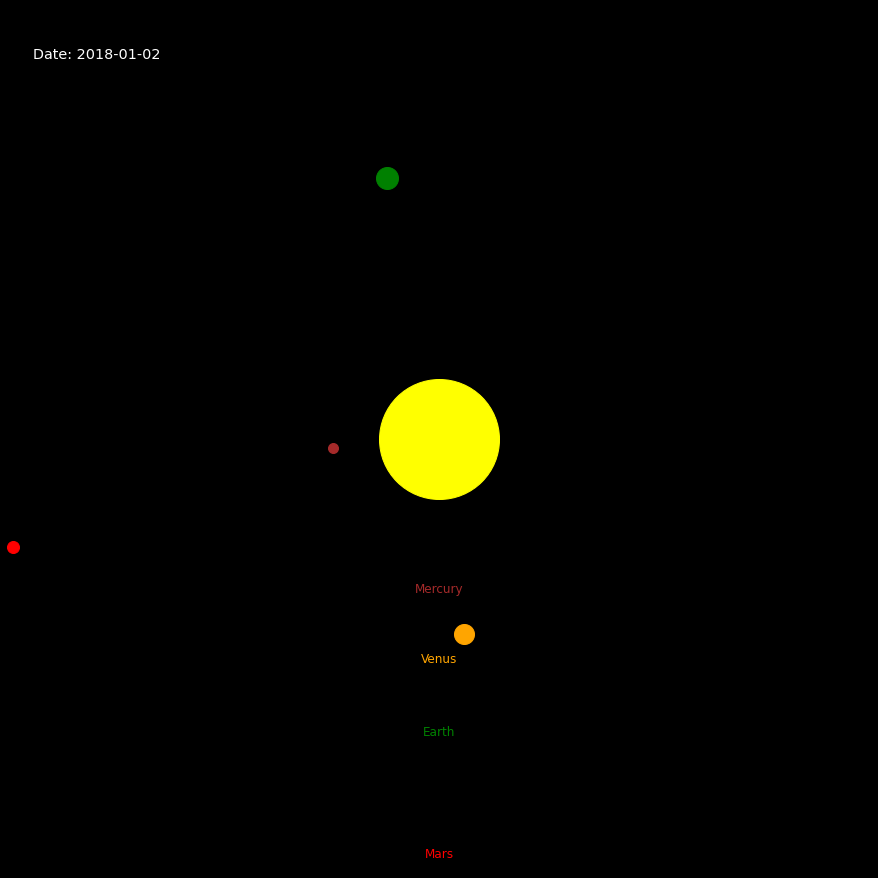

In [14]:
#Primer modelo
import json
import numpy as np
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from datetime import date, datetime, timedelta

sim_duration = 3 * 365                # (int) simulation duration in days
planet_sizes = [0.5, 1.0, 1.1, 0.6]
class Object:                   # define the objects: the Sun, Earth, Mercury, etc
    def __init__(self, name, rad, color, r, v):
        self.name = name
        self.r    = np.array(r, dtype=np.float)
        self.v    = np.array(v, dtype=np.float)
        self.xs = []
        self.ys = []
        self.plot = ax.scatter(r[0], r[1], color=color, s=rad**2, edgecolors=None, zorder=10)
        self.line, = ax.plot([], [], color=color, linewidth=1.4)

class SolarSystem:
    def __init__(self, thesun):
        self.thesun = thesun
        self.planets = []
        self.time = None
        self.timestamp = ax.text(.03, .94, 'Date: ', color='w', transform=ax.transAxes, fontsize='x-large')
    def add_planet(self, planet):
        self.planets.append(planet)
    def evolve(self): # evolve the trajectories
        dt = 1
        self.time += timedelta(dt)
        plots = []
        lines = []
        for i, p in enumerate(self.planets):
            p.r += p.v * dt
            acc = -2.959e-4 * p.r / np.sum(p.r**2)**(3./2)  # in units of AU/day^2
            p.v += acc * dt
            p.xs.append(p.r[0])
            p.ys.append(p.r[1])
            p.plot.set_offsets(p.r[:2])
            plots.append(p.plot)
            p.line.set_xdata(p.xs)
            p.line.set_ydata(p.ys)
            lines.append(p.line)
        if len(p.xs) > 10000:
            raise SystemExit("Stopping after a long run to prevent memory overflow")
        self.timestamp.set_text('Date: {}'.format(self.time.isoformat()))
        return plots + lines + [self.timestamp]

plt.style.use('dark_background')
fig = plt.figure(figsize=[12, 12])
ax = plt.axes([0., 0., 1., 1.], xlim=(-1.6, 1.6), ylim=(-1.6, 1.6))
ax.set_aspect('equal')
ax.axis('off')
with open("planets.json", 'r') as f:
    planets = json.load(f)
ss = SolarSystem(Object("S", 120, 'yellow', [0, 0, 0], [0, 0, 0]))
ss.time = datetime.strptime(planets["date"], '%Y-%m-%d').date()
nasaids = [1, 2, 3, 4]   # The 1st, 2nd, 3rd, and 4th planet in solar system
# colors = ['gray', 'orange', 'blue', 'yellow', 'chocolate']
colors = ['brown', 'orange', 'green', 'red']
texty = [.47, .73, 1, 1.45]
for i, nasaid in enumerate(nasaids):
    planet = planets[str(nasaid)]
    ss.add_planet(Object(nasaid, 20*planet_sizes[i], colors[i], planet["r"], planet["v"]))
    ax.text(0, - (texty[i] + 0.1), planet["name"], color=colors[i],
            zorder=1000, ha='center', fontsize='large')

def animate(i):
    return ss.evolve()

ani = animation.FuncAnimation(fig, animate, repeat=False, frames=sim_duration, blit=True, interval=20,)
plt.show()
ani.save('solar_system_6in_150dpi-inner1.mp4', fps=60, dpi=150)

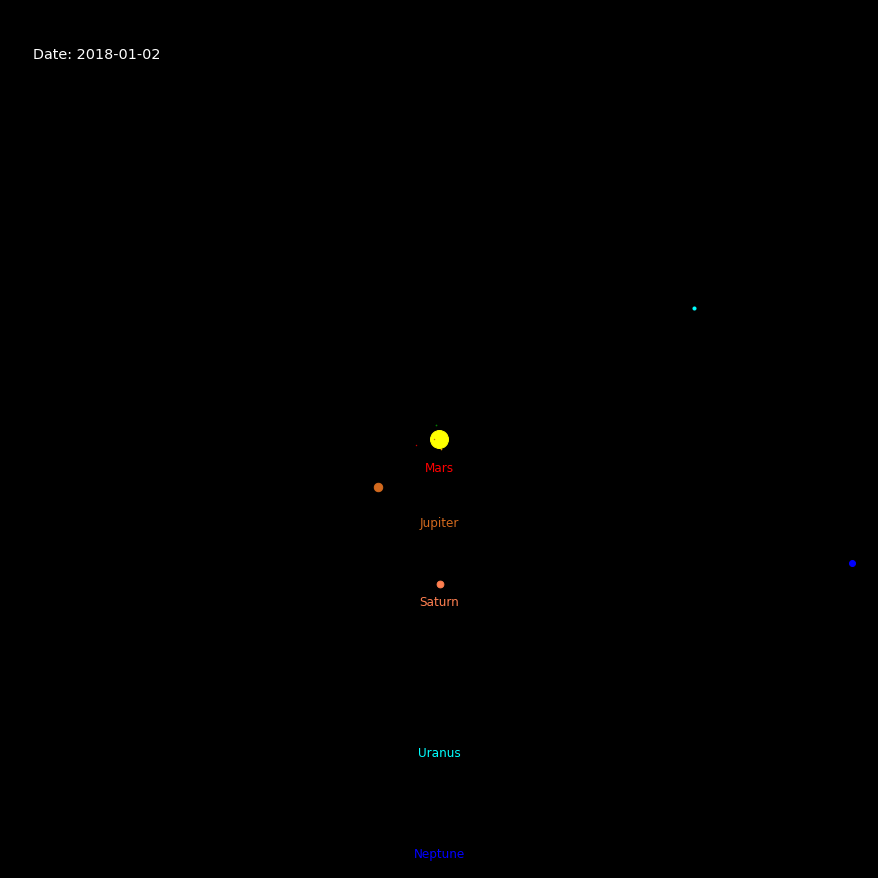

In [17]:
#Primer modelo
sim_duration = 3 * 365                # (int) simulation duration in days
G = 1.4878e-34
mass_sun=1.9891e30
mass_planets=[3.3022e23,4.8685e24,5.9736e24,6.4185e23,1.8986e27,5.6846e26,8.6810e25,10.243e25]
planet_sizes = [0.09, 0.18, 0.2, 0.108, 2.25, 1.8, 0.82, 1.6]
class Object:                   # define the objects: the Sun, Earth, Mercury, etc
    def __init__(self,name,mass,rad, color, r, v):
        self.name = name
        self.mass = mass
        self.r    = np.array(r, dtype=np.float)
        self.v    = np.array(v, dtype=np.float)
        self.xs = []
        self.ys = []
        self.plot = ax.scatter(r[0], r[1], color=color, s=rad**2, edgecolors=None, zorder=10)
        self.line, = ax.plot([], [], color=color, linewidth=1.4)

class SolarSystem:
    def __init__(self, thesun):
        self.thesun = thesun
        self.planets = []
        self.time = None
        self.timestamp = ax.text(.03, .94, 'Date: ', color='w', transform=ax.transAxes, fontsize='x-large')
    def add_planet(self, planet):
        self.planets.append(planet)
    def evolve(self): # evolve the trajectories
        dt = 1
        self.time += timedelta(dt)
        plots = []
        lines = []
        for i, p in enumerate(self.planets):
            p.r += p.v * dt
            acc = -2.959e-4 * p.r / np.sum(p.r**2)**(3./2)  # in units of AU/day^2
            p.v += acc * dt
            p.xs.append(p.r[0])
            p.ys.append(p.r[1])
            p.plot.set_offsets(p.r[:2])
            plots.append(p.plot)
            p.line.set_xdata(p.xs)
            p.line.set_ydata(p.ys)
            lines.append(p.line)
        if len(p.xs) > 10000:
            raise SystemExit("Stopping after a long run to prevent memory overflow")
        self.timestamp.set_text('Date: {}'.format(self.time.isoformat()))
        return plots + lines + [self.timestamp]

plt.style.use('dark_background')
fig = plt.figure(figsize=[12, 12])
ax = plt.axes([0., 0., 1., 1.], xlim=(-30, 30), ylim=(-30, 30))
ax.set_aspect('equal')
ax.axis('off')
with open("planets.json", 'r') as f:
    planets = json.load(f)
ss = SolarSystem(Object("S",mass_sun,18, 'yellow', [0, 0, 0], [0, 0, 0]))
ss.time = datetime.strptime(planets["date"], '%Y-%m-%d').date()
nasaids = [1, 2, 3, 4, 5, 6, 7, 8]   # The 1st, 2nd, 3rd, and 4th planet in solar system

colors = ['brown', 'orange', 'green', 'red', 'chocolate', 'coral', 'cyan', 'blue']
texty = [.47, .73, 1.0, 2.2, 6.0, 11.5, 22.0, 29.0]
for i, nasaid in enumerate(nasaids):
    planet = planets[str(nasaid)]
    ss.add_planet(Object(nasaid, mass_planets[i],3.75 * planet_sizes[i], colors[i], planet["r"], planet["v"]))
    if i>=3:
      ax.text(0, - (texty[i] + 0.1), planet["name"], color=colors[i],
              zorder=1000, ha='center', fontsize='large')

def animate(i):
    return ss.evolve()

ani = animation.FuncAnimation(fig, animate, repeat=False, frames=sim_duration, blit=True, interval=20,)
plt.show()
ani.save('solar_system_6in_150dpi-outer.mp4', fps=60, dpi=150)

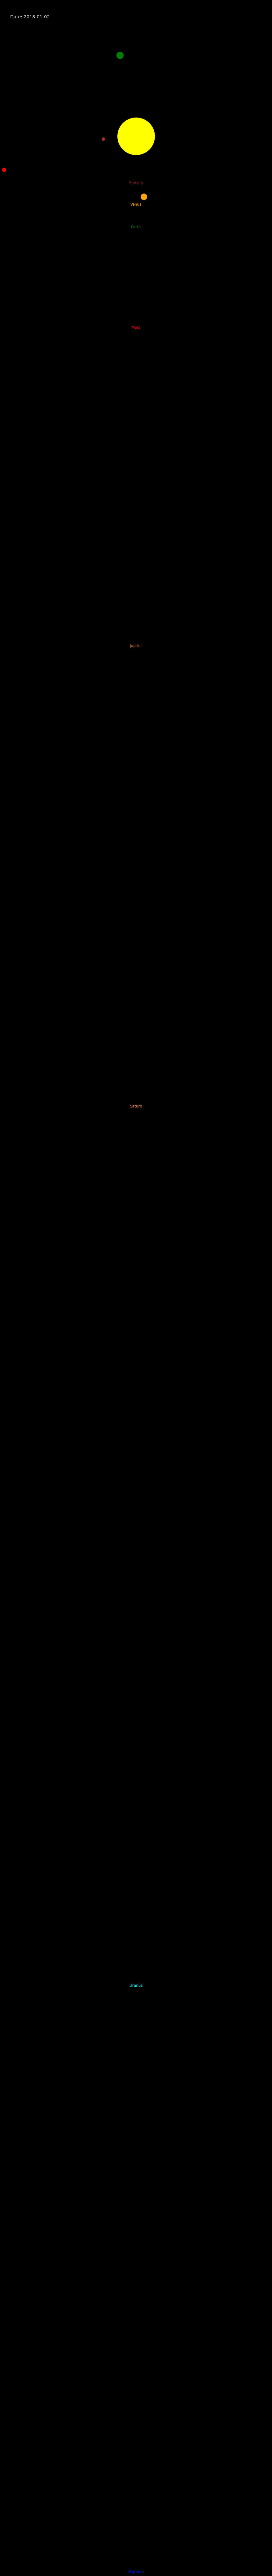

In [18]:
#Segundo modelo
sim_duration = 3 * 365                # (int) simulation duration in days
G = 1.4878e-34
mass_sun=1.9891e30
mass_planets=[3.3022e23,4.8685e24,5.9736e24,6.4185e23,1.8986e27,5.6846e26,8.6810e25,10.243e25]
planet_sizes = [0.5, 1.0, 1.1, 0.6,10,9,7,8]
class Object:                   # define the objects: the Sun, Earth, Mercury, etc
    def __init__(self, name,mass, rad, color, r, v):
        self.name = name
        self.mass = mass
        self.r    = np.array(r, dtype=np.float)
        self.v    = np.array(v, dtype=np.float)
        self.xs = []
        self.ys = []
        self.plot = ax.scatter(r[0], r[1], color=color, s=rad**2, edgecolors=None, zorder=10)
        self.line, = ax.plot([], [], color=color, linewidth=1.4)

class SolarSystem:
    def __init__(self, thesun):
        self.thesun = thesun
        self.planets = []
        self.time = None
        self.timestamp = ax.text(.03, .94, 'Date: ', color='w', transform=ax.transAxes, fontsize='x-large')
    def add_planet(self, planet):
        self.planets.append(planet)
    def evolve(self): # evolve the trajectories
        dt = 1
        self.time += timedelta(dt)
        plots=[]
        lines=[]
        for i, p in enumerate(self.planets):
            p.r += p.v * dt
            forces = np.array((0, 0, 0))
            dr = p.r-self.thesun.r
            distance = np.sum(dr**2)**(3./2)
            forces = self.thesun.mass* dr / distance

            for j, p2 in enumerate(self.planets):
              if i==j:
                continue
              dr =p.r-p2.r
              distance = np.sum(dr**2)**(3./2)
              forces += p2.mass* dr / distance

            acc = -G*forces  # in units of AU/day^2
            p.v += acc * dt
            p.xs.append(p.r[0])
            p.ys.append(p.r[1])
            p.plot.set_offsets(p.r[:2])
            plots.append(p.plot)
            p.line.set_xdata(p.xs)
            p.line.set_ydata(p.ys)
            lines.append(p.line)
        if len(p.xs) > 10000:
            raise SystemExit("Stopping after a long run to prevent memory overflow")
        self.timestamp.set_text('Date: {}'.format(self.time.isoformat()))
        return plots + lines + [self.timestamp]

plt.style.use('dark_background')
fig = plt.figure(figsize=[12, 12])
ax = plt.axes([0., 0., 1., 1.], xlim=(-1.6, 1.6), ylim=(-1.6, 1.6))
ax.set_aspect('equal')
ax.axis('off')
with open("planets.json", 'r') as f:
    planets = json.load(f)
ss = SolarSystem(Object("S",mass_sun, 120, 'yellow', [0, 0, 0], [0, 0, 0]))
ss.time = datetime.strptime(planets["date"], '%Y-%m-%d').date()
nasaids = [1, 2, 3, 4,5,6,7,8]   # The 1st, 2nd, 3rd, and 4th planet in solar system

colors = ['brown', 'orange', 'green', 'red', 'chocolate', 'coral', 'cyan', 'blue']
texty = [.47, .73, 1.0, 2.2, 6.0, 11.5, 22.0, 29.0]
for i, nasaid in enumerate(nasaids):
    planet = planets[str(nasaid)]
    ss.add_planet(Object(nasaid, mass_planets[i], 20*planet_sizes[i], colors[i], planet["r"], planet["v"]))
    ax.text(0, - (texty[i] + 0.1), planet["name"], color=colors[i],
            zorder=1000, ha='center', fontsize='large')

def animate(i):
    return ss.evolve()

ani = animation.FuncAnimation(fig, animate, repeat=False, frames=sim_duration, blit=True, interval=20,)
plt.show()
ani.save('solar_system_6in_150dpi-inner2.mp4', fps=60, dpi=150)

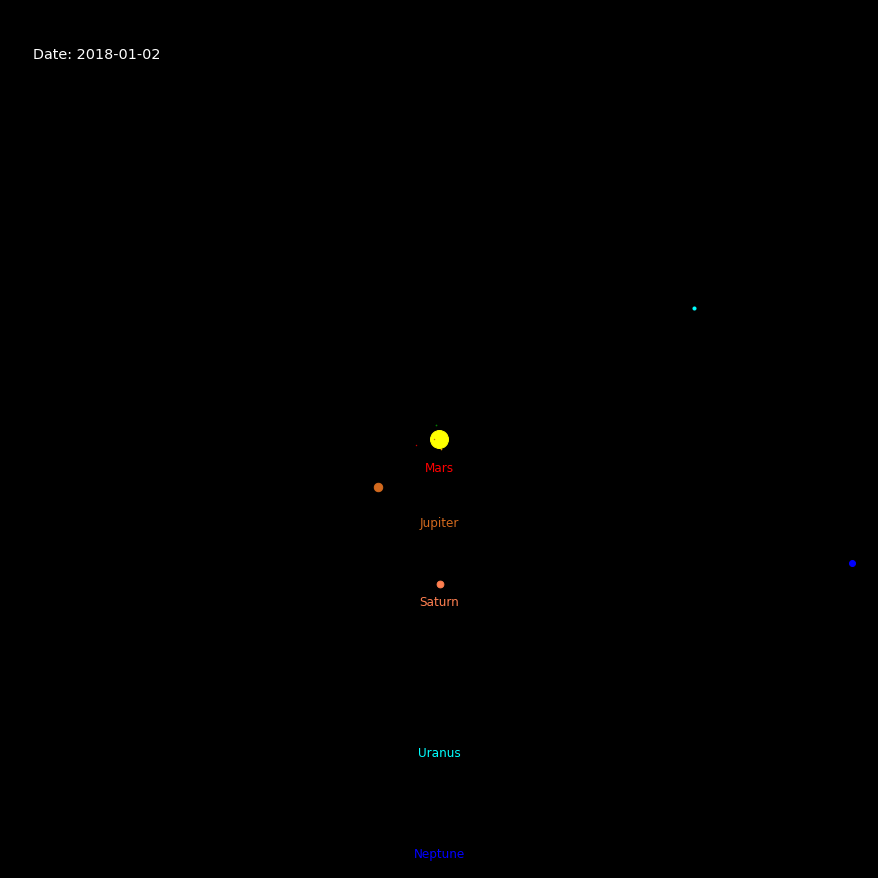

In [19]:
#Segundo modelo
sim_duration = 3 * 365                # (int) simulation duration in days
G = 1.4878e-34
mass_sun=1.9891e30
mass_planets=[3.3022e23,4.8685e24,5.9736e24,6.4185e23,1.8986e27,5.6846e26,8.6810e25,10.243e25]
planet_sizes = [0.09, 0.18, 0.2, 0.108, 2.25, 1.8, 0.82, 1.6]
class Object:                   # define the objects: the Sun, Earth, Mercury, etc
    def __init__(self, name,mass, rad, color, r, v):
        self.name = name
        self.mass = mass
        self.r    = np.array(r, dtype=np.float)
        self.v    = np.array(v, dtype=np.float)
        self.xs = []
        self.ys = []
        self.plot = ax.scatter(r[0], r[1], color=color, s=rad**2, edgecolors=None, zorder=10)
        self.line, = ax.plot([], [], color=color, linewidth=1.4)

class SolarSystem:
    def __init__(self, thesun):
        self.thesun = thesun
        self.planets = []
        self.time = None
        self.timestamp = ax.text(.03, .94, 'Date: ', color='w', transform=ax.transAxes, fontsize='x-large')
    def add_planet(self, planet):
        self.planets.append(planet)
    def evolve(self): # evolve the trajectories
        dt = 1
        self.time += timedelta(dt)
        plots=[]
        lines=[]
        for i, p in enumerate(self.planets):
            p.r += p.v * dt
            forces = np.array((0, 0, 0))
            dr = p.r-self.thesun.r
            distance = np.sum(dr**2)**(3./2)
            forces = self.thesun.mass* dr / distance

            for j, p2 in enumerate(self.planets):
              if i==j:
                continue
              dr =p.r-p2.r
              distance = np.sum(dr**2)**(3./2)
              forces += p2.mass* dr / distance

            acc = -G*forces  # in units of AU/day^2
            p.v += acc * dt
            p.xs.append(p.r[0])
            p.ys.append(p.r[1])
            p.plot.set_offsets(p.r[:2])
            plots.append(p.plot)
            p.line.set_xdata(p.xs)
            p.line.set_ydata(p.ys)
            lines.append(p.line)
        if len(p.xs) > 10000:
            raise SystemExit("Stopping after a long run to prevent memory overflow")
        self.timestamp.set_text('Date: {}'.format(self.time.isoformat()))
        return plots + lines + [self.timestamp]

plt.style.use('dark_background')
fig = plt.figure(figsize=[12, 12])
ax = plt.axes([0., 0., 1., 1.], xlim=(-30, 30), ylim=(-30, 30))
ax.set_aspect('equal')
ax.axis('off')
with open("planets.json", 'r') as f:
    planets = json.load(f)
ss = SolarSystem(Object("S",mass_sun, 18, 'yellow', [0, 0, 0], [0, 0, 0]))
ss.time = datetime.strptime(planets["date"], '%Y-%m-%d').date()
nasaids = [1, 2, 3, 4,5,6,7,8]   # The 1st, 2nd, 3rd, and 4th planet in solar system

colors = ['brown', 'orange', 'green', 'red', 'chocolate', 'coral', 'cyan', 'blue']
texty = [.47, .73, 1.0, 2.2, 6.0, 11.5, 22.0, 29.0]
for i, nasaid in enumerate(nasaids):
    planet = planets[str(nasaid)]
    ss.add_planet(Object(nasaid, mass_planets[i], 3.75*planet_sizes[i], colors[i], planet["r"], planet["v"]))
    if i>=3:
      ax.text(0, - (texty[i] + 0.1), planet["name"], color=colors[i],
              zorder=1000, ha='center', fontsize='large')

def animate(i):
    return ss.evolve()

ani = animation.FuncAnimation(fig, animate, repeat=False, frames=sim_duration, blit=True, interval=20,)
plt.show()
ani.save('solar_system_6in_150dpi-outer2.mp4', fps=60, dpi=150)

In [ ]:
#!/usr/bin/env python

#ERROR RELATIVO

import json
import numpy as np
from datetime import date, datetime, timedelta
import time

sim_duration = 3 * 365                # (int) simulation duration in days


class Object:                   # define the objects: the Sun, Earth, Mercury, etc
    def __init__(self, name, rad, color, r, v):
        self.name = name
        self.r    = np.array(r, dtype=np.float)
        self.v    = np.array(v, dtype=np.float)
        self.xs = []
        self.ys = []
        self.xstest = []
        self.ystest = []
        self.zstest = []
        self.vxtest = []
        self.vytest = []
        self.vztest = []

class SolarSystem:
    def __init__(self, thesun):
        self.thesun = thesun
        self.planets = []
        self.time = None
    def add_planet(self, planet):
        self.planets.append(planet)
    def evolve(self): # evolve the trajectories
        dt = 1
        self.time += timedelta(dt)
        plots = []
        lines = []
        for i, p in enumerate(self.planets):
            p.r += p.v * dt
            acc = -2.959e-4 * p.r / np.sum(p.r**2)**(3./2)  # in units of AU/day^2
            p.v += acc * dt
            if self.time.month % 3 == 0 and self.time.day==1:
              p.xstest.append(p.r[0])
              p.ystest.append(p.r[1])
              p.zstest.append(p.r[2])
              p.vxtest.append(p.v[0])
              p.vytest.append(p.v[1])
              p.vztest.append(p.v[2])
            p.xs.append(p.r[0])
            p.ys.append(p.r[1])
        if len(p.xs) > 10000:
            raise SystemExit("Stopping after a long run to prevent memory overflow")

with open("planets.json", 'r') as f:
    planets = json.load(f)
ti=time.time()
ss = SolarSystem(Object("Sun", 28, 'red', [0, 0, 0], [0, 0, 0]))
ss.time = datetime.strptime(planets["date"], '%Y-%m-%d').date()
nasaids = [1, 2, 3, 4,5,6,7,8]   # The 1st, 2nd, 3rd, and 4th planet in solar system
colors = ['gray', 'orange', 'blue', 'yellow', 'chocolate','gray', 'orange', 'blue']
texty = [.47, .73, 1, 1.5,4, 8, 14, 20]
for i, nasaid in enumerate(nasaids):
    planet = planets[str(nasaid)]
    ss.add_planet(Object(nasaid, 20 * planet["size"], colors[i], planet["r"], planet["v"]))


for i in range(sim_duration):
    ss.evolve()
tf=time.time()
print("Time of execution (sec): ",str(tf-ti))

er_system=[]
dates=["2018-03-01","2018-06-01","2018-09-01","2018-12-01","2019-03-01","2019-06-01","2019-09-01","2019-12-01","2020-03-01","2020-06-01","2020-09-01","2020-12-01"]
for i,date in enumerate(dates):
  er_date=[]
  er_date.append(date)
  with open("planets-"+date+".json", 'r') as f:
      planetst = json.load(f)
      for j, nasaid in enumerate(nasaids):
        planet = planetst[str(nasaid)]
        er_x= abs((planet["r"][0]-ss.planets[j].xstest[i])/planet["r"][0])
        er_y= abs((planet["r"][1]-ss.planets[j].ystest[i])/planet["r"][1])
        er_z= abs((planet["r"][2]-ss.planets[j].zstest[i])/planet["r"][2])
        er_pos= (er_x+er_y+er_z)/3
        er_vx= abs((planet["v"][0]-ss.planets[j].vxtest[i])/planet["v"][0])
        er_vy= abs((planet["v"][1]-ss.planets[j].vytest[i])/planet["v"][1])
        er_vz= abs((planet["v"][2]-ss.planets[j].vztest[i])/planet["v"][2])
        er_vel= (er_vx+er_vy+er_vz)/3
        er_date.append(er_pos)
        er_date.append(er_vel)
  prom_er_pos=sum(er_date[1::2])/len(er_date[1::2])
  prom_er_vel=sum(er_date[2::2])/len(er_date[2::2])
  er_date.append(prom_er_pos)
  er_date.append(prom_er_vel)
  er_system.append(er_date)
print(er_system)

RMSE_system=[]
dates=["2018-03-01","2018-06-01","2018-09-01","2018-12-01","2019-03-01","2019-06-01","2019-09-01","2019-12-01","2020-03-01","2020-06-01","2020-09-01","2020-12-01"]
for i,date in enumerate(dates):
  er_date=[]
  er_date.append(date)
  with open("planets-"+date+".json", 'r') as f:
      planetst = json.load(f)
      for j, nasaid in enumerate(nasaids):
        planet = planetst[str(nasaid)]
        er_x= (planet["r"][0]-ss.planets[j].xstest[i])**2
        er_y= (planet["r"][1]-ss.planets[j].ystest[i])**2
        er_z= (planet["r"][2]-ss.planets[j].zstest[i])**2
        er_pos= np.sqrt((er_x+er_y+er_z)/3)
        er_vx= (planet["v"][0]-ss.planets[j].vxtest[i])**2
        er_vy= (planet["v"][1]-ss.planets[j].vytest[i])**2
        er_vz= (planet["v"][2]-ss.planets[j].vztest[i])**2
        er_vel= np.sqrt((er_vx+er_vy+er_vz)/3)
        er_date.append(er_pos)
        er_date.append(er_vel)
  prom_er_pos=sum(er_date[1::2])/len(er_date[1::2])
  prom_er_vel=sum(er_date[2::2])/len(er_date[2::2])
  er_date.append(prom_er_pos)
  er_date.append(prom_er_vel)
  RMSE_system.append(er_date)
print(RMSE_system)

Time of execution (sec):  0.11870837211608887
[['2018-03-01', 0.5065545000157805, 0.18660865310772753, 0.07245410473854007, 0.056278404560731334, 0.027432114523838563, 0.00933494935508016, 0.004301232951636531, 0.0019290049982787951, 5.8212336882507754e-05, 9.845744228884328e-05, 1.4425024782637353e-05, 0.0012999485734348176, 2.629967821950129e-07, 0.00017080547280984285, 7.039913189331707e-07, 0.0002213764616333645, 0.07635194457244525, 0.031992699996498085], ['2018-06-01', 2.6214357461117714, 0.29128021854281616, 0.04949985522230327, 0.0775577515060533, 0.04044276435041964, 0.02551130850572474, 0.3763603994522786, 0.011321025435799386, 0.00017074640207032923, 0.00027505009109710245, 4.461754529272871e-05, 0.001397923830695144, 4.0616797748939595e-06, 0.0004956134551409983, 5.0257759074294315e-06, 0.0006170446797590859, 0.3859954020674772, 0.051056992005885746], ['2018-09-01', 1.52324083059745, 0.5904923937738583, 0.006263958861876494, 0.006569591399872306, 0.046974858065229, 0.020806

In [ ]:
#!/usr/bin/env python

#RMSE

import json
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from datetime import date, datetime, timedelta
import time

sim_duration = 3 * 365                # (int) simulation duration in days


class Object:                   # define the objects: the Sun, Earth, Mercury, etc
    def __init__(self, name, rad, color, r, v):
        self.name = name
        self.r    = np.array(r, dtype=np.float)
        self.v    = np.array(v, dtype=np.float)
        self.xs = []
        self.ys = []
        self.xstest = []
        self.ystest = []
        self.zstest = []
        self.vxtest = []
        self.vytest = []
        self.vztest = []

class SolarSystem:
    def __init__(self, thesun):
        self.thesun = thesun
        self.planets = []
        self.time = None
    def add_planet(self, planet):
        self.planets.append(planet)
    def evolve(self): # evolve the trajectories
        dt = 1
        self.time += timedelta(dt)
        plots = []
        lines = []
        for i, p in enumerate(self.planets):
            p.r += p.v * dt
            acc = -2.959e-4 * p.r / np.sum(p.r**2)**(3./2)  # in units of AU/day^2
            p.v += acc * dt
            if self.time.month % 3 == 0 and self.time.day==1:
              p.xstest.append(p.r[0])
              p.ystest.append(p.r[1])
              p.zstest.append(p.r[2])
              p.vxtest.append(p.v[0])
              p.vytest.append(p.v[1])
              p.vztest.append(p.v[2])
            p.xs.append(p.r[0])
            p.ys.append(p.r[1])
        if len(p.xs) > 10000:
            raise SystemExit("Stopping after a long run to prevent memory overflow")

with open("planets.json", 'r') as f:
    planets = json.load(f)
ti=time.time()
ss = SolarSystem(Object("Sun", 28, 'red', [0, 0, 0], [0, 0, 0]))
ss.time = datetime.strptime(planets["date"], '%Y-%m-%d').date()
nasaids = [1, 2, 3, 4,5,6,7,8]   # The 1st, 2nd, 3rd, and 4th planet in solar system
colors = ['gray', 'orange', 'blue', 'yellow', 'chocolate','gray', 'orange', 'blue']
texty = [.47, .73, 1, 1.5,4, 8, 14, 20]
for i, nasaid in enumerate(nasaids):
    planet = planets[str(nasaid)]
    ss.add_planet(Object(nasaid, 20 * planet["size"], colors[i], planet["r"], planet["v"]))

for i in range(sim_duration):
    ss.evolve()
tf=time.time()
print("Time of execution (sec): ",str(tf-ti))

er_system=[]
dates=["2018-03-01","2018-06-01","2018-09-01","2018-12-01","2019-03-01","2019-06-01","2019-09-01","2019-12-01","2020-03-01","2020-06-01","2020-09-01","2020-12-01"]
for i,date in enumerate(dates):
  er_date=[]
  er_date.append(date)
  with open("planets-"+date+".json", 'r') as f:
      planetst = json.load(f)
      for j, nasaid in enumerate(nasaids):
        planet = planetst[str(nasaid)]
        er_x= (planet["r"][0]-ss.planets[j].xstest[i])**2
        er_y= (planet["r"][1]-ss.planets[j].ystest[i])**2
        er_z= (planet["r"][2]-ss.planets[j].zstest[i])**2
        er_pos= np.sqrt((er_x+er_y+er_z)/3)
        er_vx= (planet["v"][0]-ss.planets[j].vxtest[i])**2
        er_vy= (planet["v"][1]-ss.planets[j].vytest[i])**2
        er_vz= (planet["v"][2]-ss.planets[j].vztest[i])**2
        er_vel= np.sqrt((er_vx+er_vy+er_vz)/3)
        er_date.append(er_pos)
        er_date.append(er_vel)
  prom_er_pos=sum(er_date[1::2])/len(er_date[1::2])
  prom_er_vel=sum(er_date[2::2])/len(er_date[2::2])
  er_date.append(prom_er_pos)
  er_date.append(prom_er_vel)
  er_system.append(er_date)
print(er_system)

Time of execution (sec):  0.11640381813049316
[['2018-03-01', 0.05938214692961259, 0.0035959754402484436, 0.013792344171438186, 0.00024244230631514357, 0.0065685566246415404, 8.890254958331767e-05, 0.002038727055207836, 1.516612741592959e-05, 0.00018177055346264587, 4.3002411314139794e-07, 6.132817019175058e-05, 4.232913844724757e-07, 4.814524802306704e-06, 3.213031952652801e-07, 9.19960331761649e-06, 3.3379367316368923e-07, 0.01025486095408431, 0.0004929993544911096], ['2018-06-01', 0.1018323252890867, 0.00752367717568908, 0.01958984772374385, 0.000319442598993657, 0.019288593538495057, 0.0001717129506384532, 0.006642670203672998, 3.747734969783235e-05, 0.0005111164984019251, 1.2110251696779136e-06, 0.0002031557825800214, 1.0924920847698128e-06, 3.2511734681981966e-05, 8.272337021639534e-07, 5.911447685518331e-05, 8.588197810228462e-07, 0.01851991690593972, 0.001007037455719582], ['2018-09-01', 0.14426048513215914, 0.011722223396523167, 0.004507366767383861, 0.00011201460325912384, 0.

Ahora con un modelo más completo.

In [ ]:
#!/usr/bin/env python

#ERROR RELATIVO

import json
import numpy as np
from datetime import date, datetime, timedelta
import time

sim_duration = 3 * 365                # (int) simulation duration in days
G = 1.4878e-34
mass_sun=1.9891e30
mass_planets=[3.3022e23,4.8685e24,5.9736e24,6.4185e23,1.8986e27,5.6846e26,8.6810e25,10.243e25]
class Object:                   # define the objects: the Sun, Earth, Mercury, etc
    def __init__(self, name,mass, rad, color, r, v):
        self.name = name
        self.mass = mass
        self.r    = np.array(r, dtype=np.float)
        self.v    = np.array(v, dtype=np.float)
        self.xs = []
        self.ys = []
        self.xstest = []
        self.ystest = []
        self.zstest = []
        self.vxtest = []
        self.vytest = []
        self.vztest = []

class SolarSystem:
    def __init__(self, thesun):
        self.thesun = thesun
        self.planets = []
        self.time = None
    def add_planet(self, planet):
        self.planets.append(planet)
    def evolve(self): # evolve the trajectories
        dt = 1
        self.time += timedelta(dt)
        for i, p in enumerate(self.planets):
            p.r += p.v * dt
            forces = np.array((0, 0, 0))
            dr = p.r-self.thesun.r
            distance = np.sum(dr**2)**(3./2)
            forces = self.thesun.mass* dr / distance

            for j, p2 in enumerate(self.planets):
              if i==j:
                continue
              dr =p.r-p2.r
              distance = np.sum(dr**2)**(3./2)
              forces += p2.mass* dr / distance

            acc = -G*forces  # in units of AU/day^2
            p.v += acc * dt
            if self.time.month % 3 == 0 and self.time.day==1:
              p.xstest.append(p.r[0])
              p.ystest.append(p.r[1])
              p.zstest.append(p.r[2])
              p.vxtest.append(p.v[0])
              p.vytest.append(p.v[1])
              p.vztest.append(p.v[2])
            p.xs.append(p.r[0])
            p.ys.append(p.r[1])
        if len(p.xs) > 10000:
            raise SystemExit("Stopping after a long run to prevent memory overflow")

with open("planets.json", 'r') as f:
    planets = json.load(f)
ti=time.time()
ss = SolarSystem(Object("Sun", mass_sun, 28, 'red', [0, 0, 0], [0, 0, 0]))
ss.time = datetime.strptime(planets["date"], '%Y-%m-%d').date()
nasaids = [1, 2, 3, 4,5,6,7,8]   # The 1st, 2nd, 3rd, and 4th planet in solar system
colors = ['gray', 'orange', 'blue', 'yellow', 'chocolate','gray', 'orange', 'blue']
texty = [.47, .73, 1, 1.5,4, 8, 14, 20]
for i, nasaid in enumerate(nasaids):
    planet = planets[str(nasaid)]
    ss.add_planet(Object(nasaid, mass_planets[i], 20 * planet["size"], colors[i], planet["r"], planet["v"]))


for i in range(sim_duration):
    ss.evolve()
tf=time.time()
print("Time of execution (sec): ",str(tf-ti))

er_system=[]
dates=["2018-03-01","2018-06-01","2018-09-01","2018-12-01","2019-03-01","2019-06-01","2019-09-01","2019-12-01","2020-03-01","2020-06-01","2020-09-01","2020-12-01"]
for i,date in enumerate(dates):
  er_date=[]
  er_date.append(date)
  with open("planets-"+date+".json", 'r') as f:
      planetst = json.load(f)
      for j, nasaid in enumerate(nasaids):
        planet = planetst[str(nasaid)]
        er_x= abs((planet["r"][0]-ss.planets[j].xstest[i])/planet["r"][0])
        er_y= abs((planet["r"][1]-ss.planets[j].ystest[i])/planet["r"][1])
        er_z= abs((planet["r"][2]-ss.planets[j].zstest[i])/planet["r"][2])
        er_pos= (er_x+er_y+er_z)/3
        er_vx= abs((planet["v"][0]-ss.planets[j].vxtest[i])/planet["v"][0])
        er_vy= abs((planet["v"][1]-ss.planets[j].vytest[i])/planet["v"][1])
        er_vz= abs((planet["v"][2]-ss.planets[j].vztest[i])/planet["v"][2])
        er_vel= (er_vx+er_vy+er_vz)/3
        er_date.append(er_pos)
        er_date.append(er_vel)
  prom_er_pos=sum(er_date[1::2])/len(er_date[1::2])
  prom_er_vel=sum(er_date[2::2])/len(er_date[2::2])
  er_date.append(prom_er_pos)
  er_date.append(prom_er_vel)
  er_system.append(er_date)
print(er_system)

RMSE_system=[]
dates=["2018-03-01","2018-06-01","2018-09-01","2018-12-01","2019-03-01","2019-06-01","2019-09-01","2019-12-01","2020-03-01","2020-06-01","2020-09-01","2020-12-01"]
for i,date in enumerate(dates):
  er_date=[]
  er_date.append(date)
  with open("planets-"+date+".json", 'r') as f:
      planetst = json.load(f)
      for j, nasaid in enumerate(nasaids):
        planet = planetst[str(nasaid)]
        er_x= (planet["r"][0]-ss.planets[j].xstest[i])**2
        er_y= (planet["r"][1]-ss.planets[j].ystest[i])**2
        er_z= (planet["r"][2]-ss.planets[j].zstest[i])**2
        er_pos= np.sqrt((er_x+er_y+er_z)/3)
        er_vx= (planet["v"][0]-ss.planets[j].vxtest[i])**2
        er_vy= (planet["v"][1]-ss.planets[j].vytest[i])**2
        er_vz= (planet["v"][2]-ss.planets[j].vztest[i])**2
        er_vel= np.sqrt((er_vx+er_vy+er_vz)/3)
        er_date.append(er_pos)
        er_date.append(er_vel)
  prom_er_pos=sum(er_date[1::2])/len(er_date[1::2])
  prom_er_vel=sum(er_date[2::2])/len(er_date[2::2])
  er_date.append(prom_er_pos)
  er_date.append(prom_er_vel)
  RMSE_system.append(er_date)
print(RMSE_system)

Time of execution (sec):  0.7482404708862305
[['2018-03-01', 0.5040211536700167, 0.18542385179344034, 0.07205016482595962, 0.05525027778963596, 0.01847628825103759, 0.004723762260292157, 0.004320726764742086, 0.001925261221947818, 5.7898455268425607e-05, 8.866270460775541e-05, 1.7979737526999323e-05, 0.0008317622072720594, 2.9187512388701733e-07, 0.00018298467357512574, 7.167863508609321e-07, 0.0002322656403961862, 0.07486815254575326, 0.031082353536395924], ['2018-06-01', 2.603659281137386, 0.2889761376790069, 0.04784882677377489, 0.07366584804300241, 0.03999447257934494, 0.05039007793801651, 0.37752455727741857, 0.011532280477444472, 0.00016831337428165841, 0.00025348891752970094, 5.360526334544733e-05, 0.0009161393714030106, 4.4842630237455065e-06, 0.0005261524143723625, 5.1104408031723374e-06, 0.0006462463855401954, 0.3836573313886723, 0.05336329640328944], ['2018-09-01', 1.5120662028350509, 0.5875727270074583, 0.0049833566662921295, 0.006295993250934706, 0.09138213335160615, 0.019

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/astropy/time/core.py", line 548, in _get_time_fmt
    return cls(val, val2, scale, precision, in_subfmt, out_subfmt)
  File "/usr/local/lib/python3.6/dist-packages/astropy/time/formats.py", line 139, in __init__
    self.out_subfmt = out_subfmt
  File "/usr/local/lib/python3.6/dist-packages/astropy/time/formats.py", line 181, in out_subfmt
    self._select_subfmts(subfmt)
  File "/usr/local/lib/python3.6/dist-packages/astropy/time/formats.py", line 392, in _select_subfmts
    raise ValueError(f'subformat {pattern!r} must match one of '
ValueError: subformat 'date' must match one of ['float', 'long', 'decimal', 'str', 'bytes'] for format jd

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-p

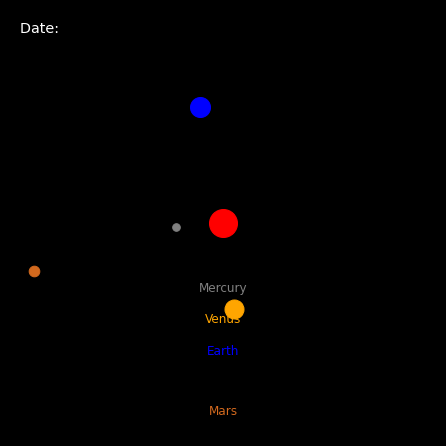

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from astropy.time import Time
from astroquery.jplhorizons import Horizons

sim_start_date = "2018-01-01"     # simulating a solar system starting from this date
sim_duration = 2 * 365                # (int) simulation duration in days
m_earth = 5.9722e24 / 1.98847e30  # Mass of Earth relative to mass of the sun
m_moon = 7.3477e22 / 1.98847e30

class Object:                   # define the objects: the Sun, Earth, Mercury, etc
    def __init__(self, name, rad, color, r, v):
        self.name = name
        self.r    = np.array(r, dtype=np.float)
        self.v    = np.array(v, dtype=np.float)
        self.xs = []
        self.ys = []
        self.plot = ax.scatter(r[0], r[1], color=color, s=rad**2, edgecolors=None, zorder=10)
        self.line, = ax.plot([], [], color=color, linewidth=1.4)

class SolarSystem:
    def __init__(self, thesun):
        self.thesun = thesun
        self.planets = []
        self.time = None
        self.timestamp = ax.text(.03, .94, 'Date: ', color='w', transform=ax.transAxes, fontsize='x-large')
    def add_planet(self, planet):
        self.planets.append(planet)
    def evolve(self):           # evolve the trajectories
        dt = 1.0
        self.time += dt
        plots = []
        lines = []
        for p in self.planets:
            p.r += p.v * dt
            acc = -2.959e-4 * p.r / np.sum(p.r**2)**(3./2)  # in units of AU/day^2
            p.v += acc * dt
            p.xs.append(p.r[0])
            p.ys.append(p.r[1])
            p.plot.set_offsets(p.r[:2])
            p.line.set_xdata(p.xs)
            p.line.set_ydata(p.ys)
            plots.append(p.plot)
            lines.append(p.line)
        self.timestamp.set_text('Date: ' + Time(self.time, format='jd', out_subfmt='date').iso)
        return plots + lines + [self.timestamp]

plt.style.use('dark_background')
fig = plt.figure(figsize=[6, 6])
ax = plt.axes([0., 0., 1., 1.], xlim=(-1.8, 1.8), ylim=(-1.8, 1.8))
ax.set_aspect('equal')
ax.axis('off')
ss = SolarSystem(Object("Sun", 28, 'red', [0, 0, 0], [0, 0, 0]))
ss.time = Time(sim_start_date).jd
colors = ['gray', 'orange', 'blue', 'chocolate']
sizes = [0.38, 0.95, 1., 0.53]
names = ['Mercury', 'Venus', 'Earth', 'Mars']
texty = [.47, .73, 1, 1.5]
for i, nasaid in enumerate([1, 2, 3, 4]):  # The 1st, 2nd, 3rd, 4th planet in solar system
    obj = Horizons(id=nasaid, location="@sun", epochs=ss.time, id_type='id').vectors()
    ss.add_planet(Object(nasaid, 20 * sizes[i], colors[i], 
                         [np.double(obj[xi]) for xi in ['x', 'y', 'z']], 
                         [np.double(obj[vxi]) for vxi in ['vx', 'vy', 'vz']]))
    ax.text(0, - (texty[i] + 0.1), names[i], color=colors[i], zorder=1000, ha='center', fontsize='large')
def animate(i):
    return ss.evolve()
ani = animation.FuncAnimation(fig, animate, repeat=False, frames=sim_duration, blit=True, interval=20,)
plt.show()

In [1]:
r_sol=695.800
print(2.440/r_sol)
print(6.052/r_sol)
print(6.371/r_sol)
print(3.390/r_sol)
print(69.911/r_sol)
print(58.232/r_sol)
print(25.362/r_sol)
print(49.244/r_sol)


0.003506754814601897
0.008697901695889623
0.009156366772060939
0.0048720896809428
0.10047571141132511
0.08369071572290888
0.036450129347513655
0.0707732106927278


In [ ]:
class SolarSystem:
    def __init__(self, thesun):
        self.thesun = thesun
        self.planets = []
        self.time = None
        self.timestamp = ax.text(.03, .94, 'Date: ', color='w', transform=ax.transAxes, fontsize='x-large')
    def add_planet(self, planet):
        self.planets.append(planet)
    def evolve(self): # evolve the trajectories
        dt = 1
        self.time += timedelta(dt)
        plots = []
        lines = []
        for i, p in enumerate(self.planets):
            p.r += p.v * dt
            forces = np.array((0, 0, 0))
            dr = p.r-self.thesun.r
            distance = np.sum(dr**2)**(3./2)
            forces = self.thesun.mass* dr / distance

            for j, p2 in enumerate(self.planets):
              if i==j:
                continue
              dr =p.r-p2.r
              distance = np.sum(dr**2)**(3./2)
              forces += p2.mass* dr / distance

            acc = -G*forces  # in units of AU/day^2
            p.v += acc * dt
            p.xs.append(p.r[0])
            p.ys.append(p.r[1])
            p.plot.set_offsets(p.r[:2])
            plots.append(p.plot)
            p.line.set_xdata(p.xs)
            p.line.set_ydata(p.ys)
            lines.append(p.line)
        if len(p.xs) > 10000:
            raise SystemExit("Stopping after a long run to prevent memory overflow")
        self.timestamp.set_text('Date: {}'.format(self.time.isoformat()))
        return plots + lines + [self.timestamp]